

# COE Results - Predicting the Bids Received for bidding no.2 of March 2020

For this project we will be trying to predict the bids receivable for the next bidding exercise. There are a total of two COE biddings each month, defined by 1 and 2 within bidding_no. Given the COE results data set consisting of quota, bids_success, bids_received and premium, we will create a model that can determine what is the next bidding exercise's bids receivable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

We start by reading in the file into a pandas dataframe.

In [2]:
coe = pd.read_csv('coe-results.csv')

Next we use **.head() & .tail()** to check the top & bottom records for any discrepencies. i.e. if everything is in order, if there are any missing data or NaN etc

In [3]:
coe.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [4]:
coe.tail()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
1225,2020-03,2,Category A,982,962,1421,31210
1226,2020-03,2,Category B,992,943,1366,30012
1227,2020-03,2,Category C,448,448,708,22002
1228,2020-03,2,Category D,581,576,757,4489
1229,2020-03,2,Category E,331,324,503,32500


# Exploratory Data Analysis

## Determine if there are Missing Data

We can use seaborn **(sns.heatmap)** to create a simple heatmap to see where we are missing data.

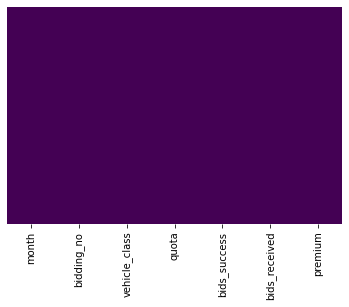

In [5]:
sns.heatmap(coe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the heatmap, we see a solid uniform colour throughout without any 'holes'. i.e. no missing data.

## Filtering 

Based on the data, we found that Category D (for motorcycles) has a big gap in values for the variable 'Premium' --> 3,928 vs 54,485 average for the other vehicle categories, hence we will filter Category D out whilst resetting the index.

In [6]:
coe = coe.loc[coe['vehicle_class'] != 'Category D']
coe = coe.reset_index(drop=True)

Filtered out all records of 'vehicle_class' == 'Category D'. Print out to verify.

In [7]:
coe

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category E,586,567,1011,19889
4,2010-01,2,Category A,1151,1149,1673,20501
...,...,...,...,...,...,...,...
979,2020-03,1,Category E,333,331,512,32500
980,2020-03,2,Category A,982,962,1421,31210
981,2020-03,2,Category B,992,943,1366,30012
982,2020-03,2,Category C,448,448,708,22002


Finally, we will drop the last 4 rows of data pertaining to the bidding no. 2 for March 2020 to serve as inputs for our prediction w/index resetting.

In [8]:
coe = coe.drop(coe.index[[-1,-2,-3,-4]])
coe = coe.reset_index(drop=True)

Filtered out last 4 rows of data pertaining to mar 2020 bidding_no. 1. Print out to verify.

The reason why we do so is to use the real life data in these 4 rows to substitute back into the formulae y = mx+c found after obtaining all the coefficients to predict the final value of our objective = predicted bids_received. Thereafter we check with the real life data for bids_received to our obtained predicted bids_received to see what's the error rate.

In [9]:
coe

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category E,586,567,1011,19889
4,2010-01,2,Category A,1151,1149,1673,20501
...,...,...,...,...,...,...,...
975,2020-02,2,Category E,328,324,550,33301
976,2020-03,1,Category A,978,973,1436,32699
977,2020-03,1,Category B,987,987,1347,32801
978,2020-03,1,Category C,315,315,504,24202


Next we use **.info** to check the Dtype of the variables

In [10]:
coe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          980 non-null    object
 1   bidding_no     980 non-null    int64 
 2   vehicle_class  980 non-null    object
 3   quota          980 non-null    int64 
 4   bids_success   980 non-null    int64 
 5   bids_received  980 non-null    int64 
 6   premium        980 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 53.7+ KB


we then use **.describe** to check for abnormalities

In [11]:
coe.describe()

,bidding_no,quota,bids_success,bids_received,premium
count,980.000000,980.000000,980.000000,980.000000,980.000000
mean,1.497959,640.095918,631.266327,967.877551,52402.727551
std,0.500251,507.601849,505.639216,746.119557,17946.187869
min,1.000000,140.000000,126.000000,196.000000,18502.000000
25%,1.000000,292.000000,280.500000,447.000000,38000.000000
50%,1.000000,397.500000,391.000000,672.500000,50894.500000
75%,2.000000,979.000000,970.750000,1294.250000,65001.000000
max,2.000000,2272.000000,2246.000000,4545.000000,97889.000000


Visually verify that values for 25%->50%->75%->max : values should be increasing. Else, something might be wrong with the data.

Next, we use **.columns** to find out the index -> what are the variables currently in our index

In [12]:
coe.columns

Index(['month', 'bidding_no', 'vehicle_class', 'quota', 'bids_success',
       'bids_received', 'premium'],
      dtype='object')

Next, **.pairplot** to plot out the charts whereby each variable is plotted against each variable to check for abnormalities. 
e.g. outliners ->too far apart from the main body of the potted points
We also check the graphs to see which variable have a good correlationship to each other so we can use them in the x & y axis. (clustered together)

If the histograph are very far apart or do not intersect, it means they have no correlation. e.g. bidding_no plotted against the rest of the variables.

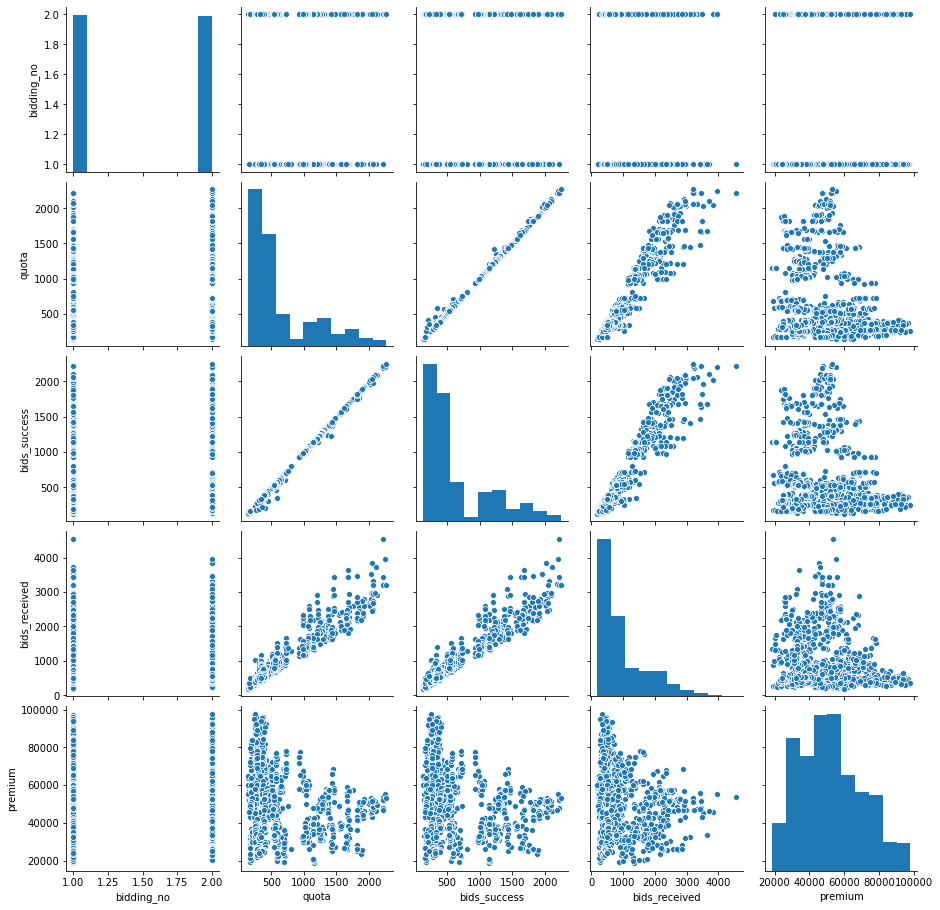

In [13]:
sns.pairplot(coe)

Here we decide what is the objective -> in our case it's finding the **bids_received.** 

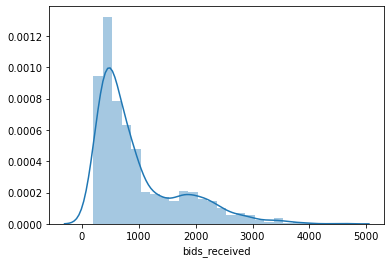

In [14]:
sns.distplot(coe['bids_received'])

We check if the chart plotted is irregular -> if normal should be sort of like a bell-curve.
Our plotted graph is a right skewed bell curve, which means most of the data are in the positive range.

Next we use **.corr** to find out the relationship between all the variables, represented by values between 1 to -1.
where 1 is the most fitting and -1 the complete opposite. All values should also be within 1 to -1.

In [15]:
coe_corr = coe.corr()
coe_corr

,bidding_no,quota,bids_success,bids_received,premium
bidding_no,1.000000,-0.000076,-0.000412,-0.004795,0.010124
quota,-0.000076,1.000000,0.999338,0.958769,-0.271153
bids_success,-0.000412,0.999338,1.000000,0.957397,-0.268738
bids_received,-0.004795,0.958769,0.957397,1.000000,-0.250794
premium,0.010124,-0.271153,-0.268738,-0.250794,1.000000


From the results of **.corr** we can see that quota, bids_success & bids_received are very closely related -> 1, 0.99 & 0.95. Bidding_no has no correlation as expected as it only represents the first or second bidding exercise in each month. However, the results show that premium is not related to the other 3 variables previously mentioned on x-axis. The reason could be because the premium range fluctuates from as low as 20k to 90k, but the other 3 variables on x-axis is quite consistent where quota average = 640, bids_success average = 631, bids_received average = 968. 

**.heatmap** is then used to see the graphical w/colour representation of correlation (The brighter the color, the more correlated they are, black being least correlated)

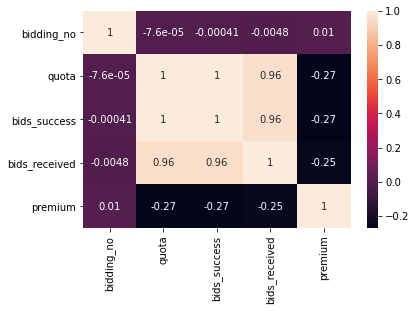

In [16]:
sns.heatmap(coe.corr(), annot=True)

From the heatmap, we can see that the correlation between quota, bids_success & bids_received is very high (max = 1)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas in order for our machine learning algorithm to take in those features as inputs.

If no abnormalities are detected, we will start to form up the variables. We decided on **bids_received** as the objective (y-axis), with the other 3 variables having the most coorelation, 'quota','bids_success' & 'premium' as the X-axis.

In [17]:
X = coe[['quota', 'bids_success','premium']]
y = coe['bids_received']

# Building a Linear Regression model

We start by splitting our data into a training set and test set.

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We split the data into 2 sets, 1. training data & 2. test data. A test size of 0.3 is used. i.e. training data = 70% of dataset & test data = 30% of dataset. 
When random_state set to an integer, train_test_split will return same results for each execution. when random_state set to an None, train_test_split will return different results for each execution. Hence, to achieve the same result each time, we set random_state = a fixed integer.

## Training and Predicting

## Method 1: Linear Regression in scikit-learn - sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

Past few lines were used to import linear regression model from sklearn & to be fit into lm, which we use to fit & train X & y values.

## Evaluation

Next, we find out what is the intercept, using **.intercept_** i.e. constant C

In [23]:
print(lm.intercept_)

20.79302570366542


**coeff_df** to find out the coefficients of quota, bids_success & premium in accordance to lm

In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
quota,2.234597
bids_success,-0.818949
premium,0.000646


Interpreting the coefficients:

**Constant C = 20.793**
- Holding all other features fixed, a 1 unit increase in **quota** is associated with an **increase of \2.234 **.
- Holding all other features fixed, a 1 unit increase in **bids_success** is associated with an **increase of \-0.8189 **.
- Holding all other features fixed, a 1 unit increase in **premium** is associated with an **increase of \$0.000646 **.

In [25]:
predictions = lm.predict(X_test)

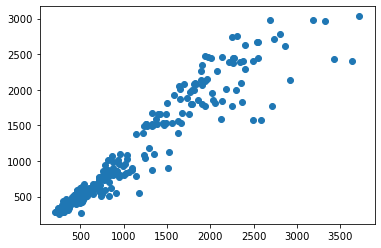

In [26]:
plt.scatter(y_test,predictions)

Plotted points should not have too many outliners & should form sort of a curved line when plotted on a line chart.
**sns.distplot** used to plot bids_received to check if graph plotted is severly skewered or not.

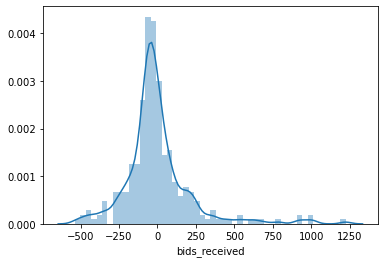

In [27]:
sns.distplot((y_test-predictions),bins=50);

Bell curve obtained from this is pretty evenly distributed on both sides, bins = 50 to fit chart onto a suitable evenly distributed graph representation, e.g. max value reaches almost 90% height of chart

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 141.33626312243717
MSE: 50452.85971432387
RMSE: 224.6171402950449


MAE is the average error.

MSE is the mean squared error.

RMSE is the root mean squared error, something we want to minimize, so a lower number for RMSE is better.

Next, we find out the accuracy of our model using **.explained_variance_score**:

In [30]:
metrics.explained_variance_score(y_test,predictions)

0.9106915438038508

the variance score (accuracy) for prediction is is **91.07%**

Print first 5 rows of prediction as its quite long. 

In [31]:
print(predictions[0:5])

[ 611.14511556 1803.44882978  574.37319994  390.85191998  350.19005013]


## Making Predictions based on the Regression Results

Recall that the equation for the Multiple Linear Regression is:

Y = C + M1*X1 + M2*X2 + …

So for our example, it would look like this:

**bids_received = (C coef) + (quota coef)*X1 + (bids_success coef)*X2 + (premium coef)X3**

And this is how the equation would look like once we plug the coefficients:

**bids_received = (20.793) + (2.234)*X1 + (-0.8189)*X2 + (0.000646)X3**

Let’s suppose that we want to predict the bids_received in the bidding_no 2 of March 2020 which we popped the data out from  
-> 0 COE issued from April to June due to Covid-19:

Putting inputs from March 2020 bidding no. 2:

**quota = 2753** (i.e., X1= 2753)

**bids_success = 2677** (i.e., X2= 2677)

**premium = 115,724** (i.e., X3= 115,724)

When you plug those numbers you’ll get:

bids_received = (20.793) + (2.234)*X1 + (-0.8189)*X2 + (0.000646)X3

**bids_received = (20.793) + (2.234)*2753 + (-0.8189)*2677 + (0.000646)*115724 = 4053.55**

The predicted/estimated value for the total bid_received in April 2020 bidding no. 2 is therefore 4053.55.

The predicted value can eventually be compared with the actual value to check the level of accuracy. 
The actual total bids_received for that month comes up to **3998** hence the prediction is off by 3998 – 4053.55 = -55.55 ~~ **1.38%** difference.

## Method 2: Linear Regression in Statsmodel method

In [32]:
import statsmodels.api as sm

In [33]:
X = coe[['quota','bids_success','premium']] 
Y = coe['bids_received']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          bids_received   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3729.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:17:49   Log-Likelihood:                -6636.5
No. Observations:                 980   AIC:                         1.328e+04
Df Residuals:                     976   BIC:                         1.330e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           33.2730     25.640      1.298   

### Making Predictions based on the Regression Results

So for this example, it would look like this:

**Adj. R-squared: 0.92**

**bids_received = (C coef) + (quota coef)*X1 + (bids_success coef)*X2 + (premium coef)X3**

And this is how the equation would look like once we plug the coefficients:

**bids_received = (33.273) + (2.2588)*X1 + (-0.8489)*X2 + (0.0005)X3**

Let’s suppose that we want to predict the bids_received in the bidding_no 2 of March 2020 which we popped the data out from  
-> 0 COE issued from April to June due to Covid-19:

Putting inputs from March 2020 bidding no. 2:

quota = 2753 (i.e., X1= 2753)

bids_success = 2677 (i.e., X2= 2677)

premium = 115,724 (i.e., X3= 115,724)

When you plug those numbers you’ll get:

bids_received = (33.273) + (2.2588)*X1 + (-0.8489)*X2 + (0.0005)*X3

**bids_received = (33.273) + (2.2588)*2753 + (-0.8489)*2677 + (0.0005)*115724 = 4037.1061**

The predicted/estimated value for the total bid_received in April 2020 bidding no. 2 is therefore 4037.1061.

The predicted value can eventually be compared with the actual value to check the level of accuracy. 
The actual total bids_received for that month comes up to **3998** hence the prediction is off by 3998 – 4037.1 = -39.1 ~~ **0.97%** difference.